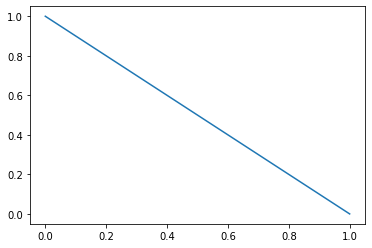

/home/russell/safe2/neuronunit/neuronunit/optimisation/optimization_management.py:8: UserWarning: X11 plotting backend not available, consider installing
  warnings.warn('X11 plotting backend not available, consider installing')


consider installing pynn a heavier backend


INFO       Cache size for target "cython": 4755 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/russell/.cython/brian_extensions" directory. [brian2]


glif python Error


In [1]:
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
plt.show()
from neuronunit.optimisation.optimization_management import inject_and_plot_model, dtc_to_rheo, inject_and_plot_passive_model
import numpy as np
from neuronunit.optimisation.data_transport_container import DataTC


{'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms, 'delay': array(200.0) * m}
{'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms, 'delay': array(200.0) * m}
-7.5 V
-7.5 V


INFO:numba.transforms:finding looplift candidates


{'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms, 'delay': array(200.0) * m}


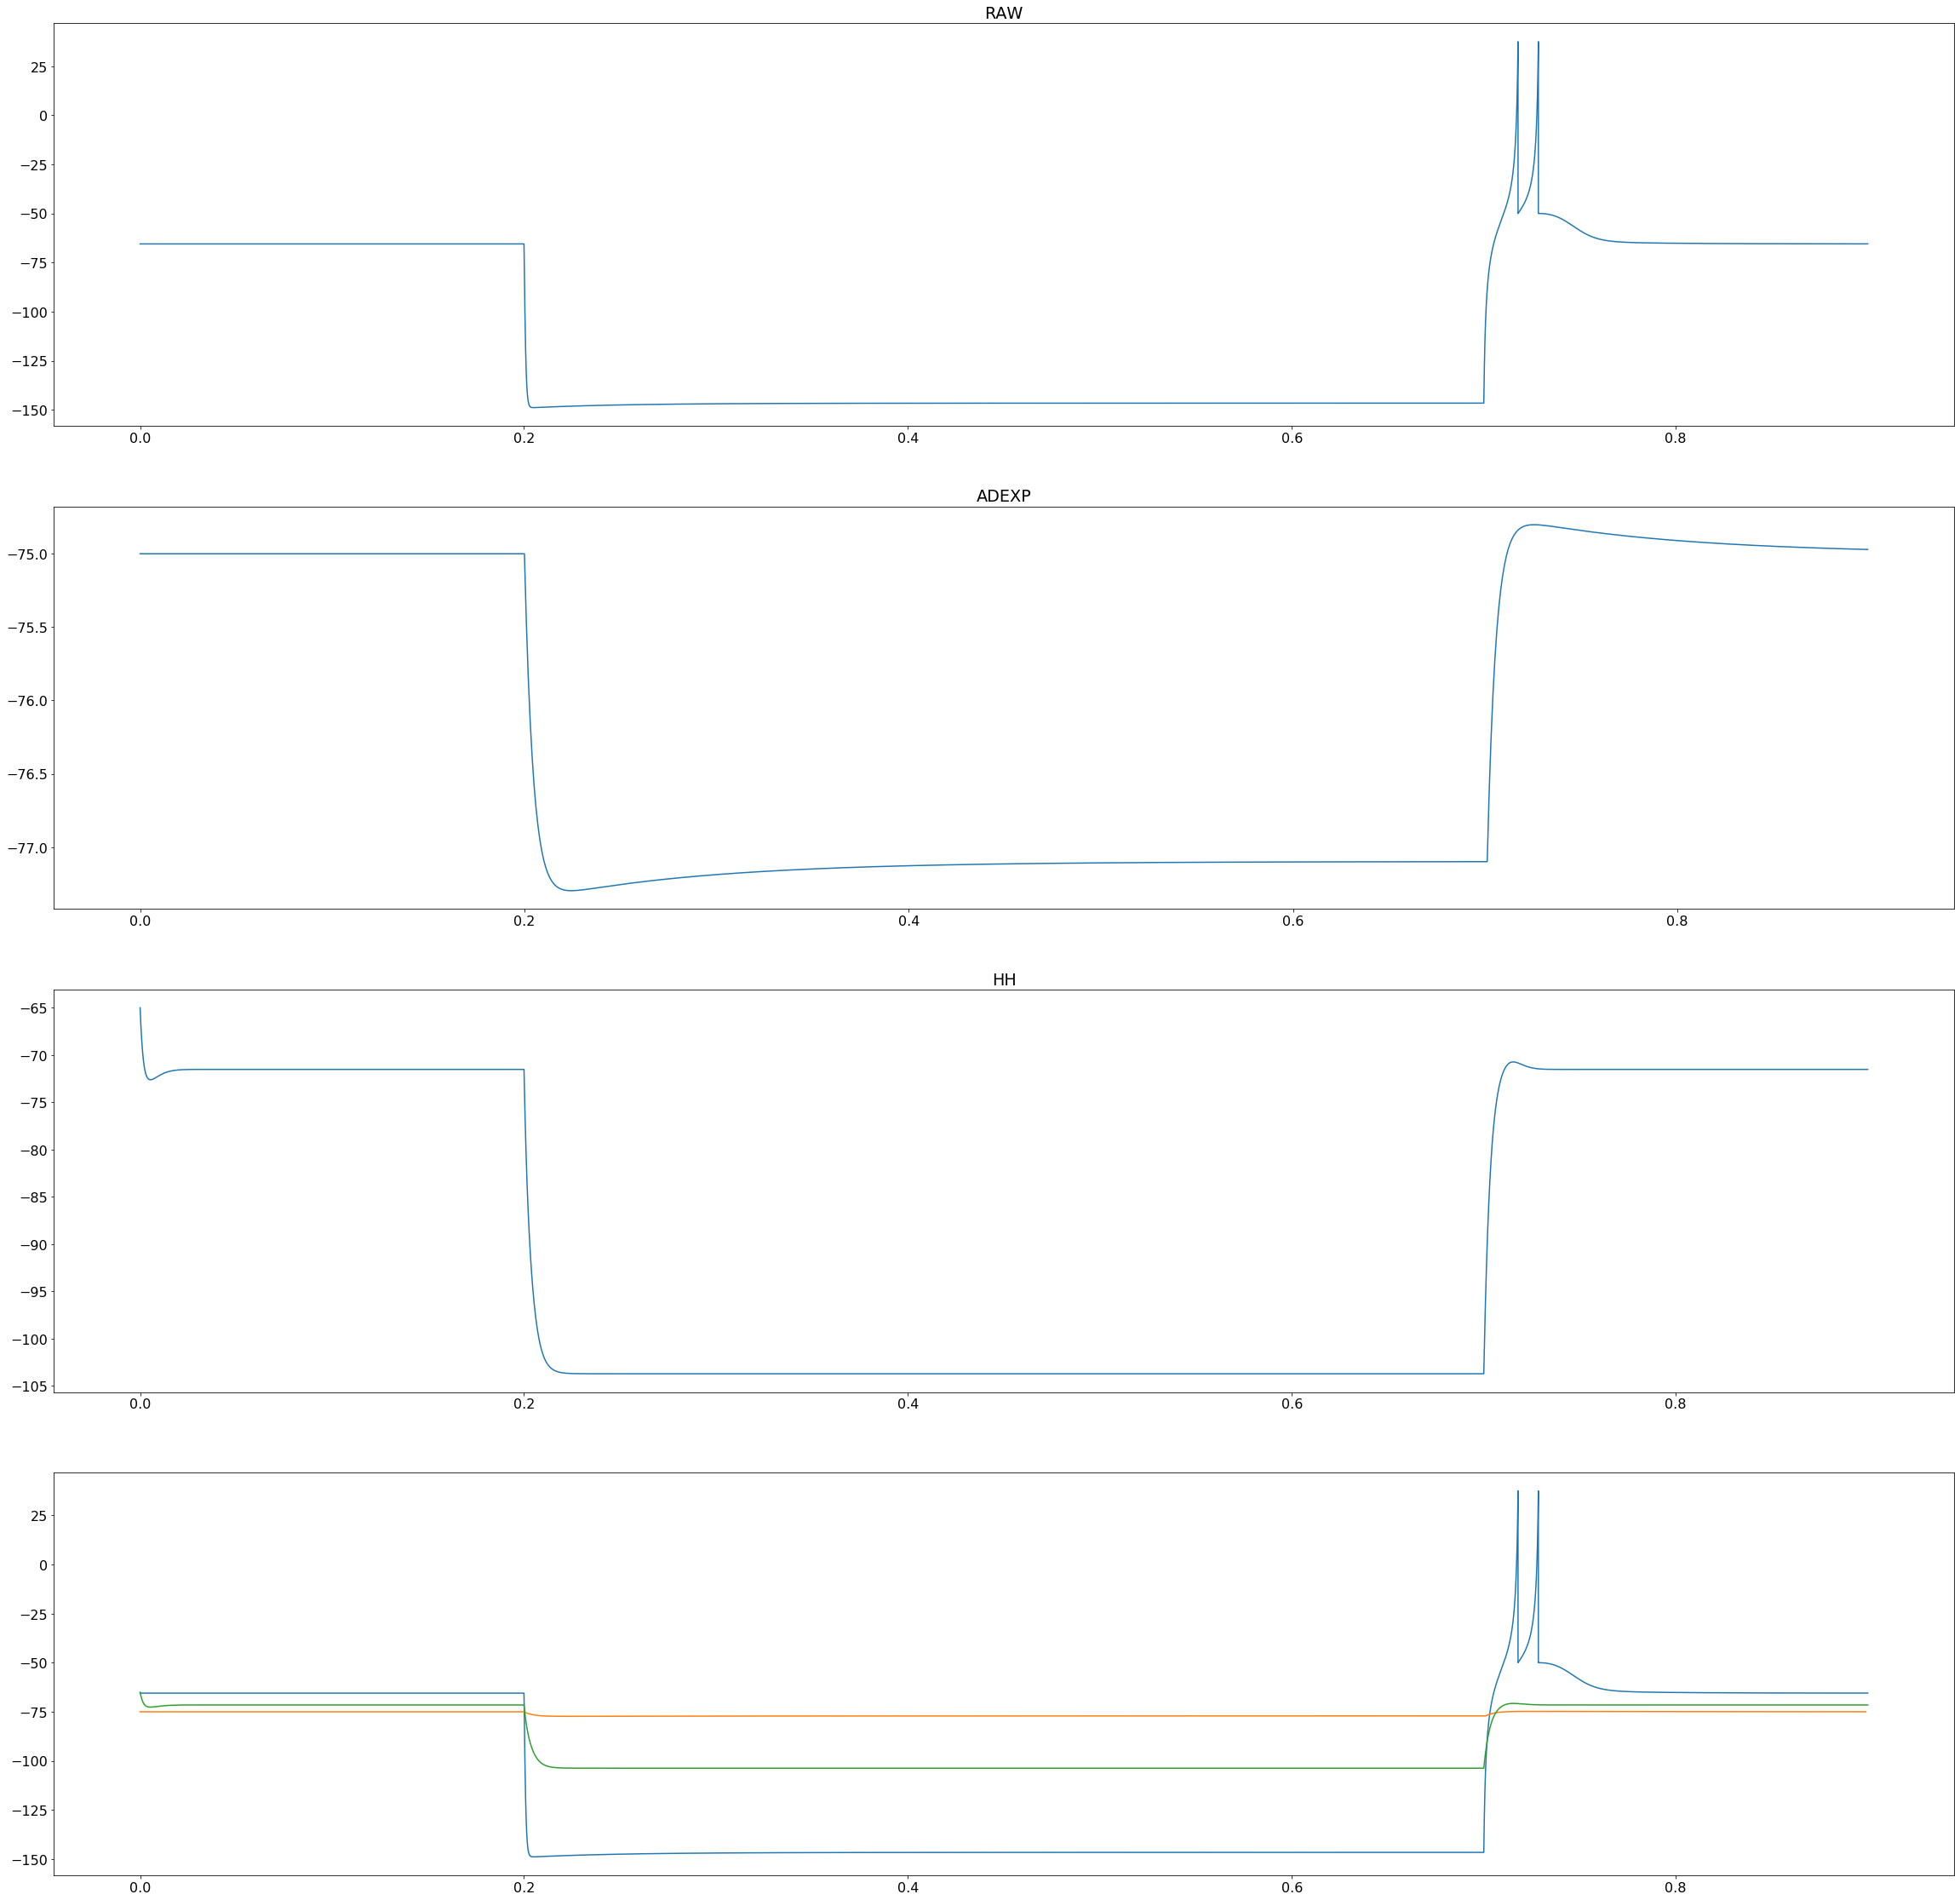

In [2]:
from neuronunit.optimisation import model_parameters
model_parameters.MODEL_PARAMS.keys()
backends = ["RAW", "ADEXP", "HH"]#"GLIF","NEURON"]
fig, axs = plt.subplots(len(backends)+1,figsize=(40, 40))
cnt=0
for b in backends:
    raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[b].items()}
    pre_model = DataTC()
    if str("V_REST") in raw_attrs.keys():
        raw_attrs["V_REST"] = -75.0
    pre_model.attrs = raw_attrs

    pre_model.backend = b
    

    vm,_ = inject_and_plot_passive_model(raw_attrs,b)
    #axs[cnt].clf()
    axs[cnt].plot(vm.times,vm.magnitude)
    axs[cnt].set_title(b)

    cnt+=1
#fig.show()  

Injected 300.0 pA current and got 20165 spikes
Injected -0.0 pA current and got 0 spikes
Injected 150.0 pA current and got 10127 spikes
Injected 75.0 pA current and got 5199 spikes
Injected 37.5 pA current and got 2705 spikes
Injected 18.75 pA current and got 1438 spikes
Injected 9.375 pA current and got 784 spikes
Injected 4.6875 pA current and got 440 spikes
Injected 2.34375 pA current and got 249 spikes
Injected 1.171875 pA current and got 136 spikes
Injected 0.5859375 pA current and got 64 spikes
Injected 0.29296875 pA current and got 18 spikes
Injected 0.146484375 pA current and got 0 spikes
Injected 0.2197265625 pA current and got 9 spikes
Injected 0.18310546875 pA current and got 1 spikes
Injected 0.164794921875 pA current and got 1 spikes
Injected 0.1556396484375 pA current and got 0 spikes
Injected 0.16021728515625 pA current and got 0 spikes
Injected 0.162506103515625 pA current and got 1 spikes
Injected 0.1613616943359375 pA current and got 1 spikes
Injected 0.16078948974609

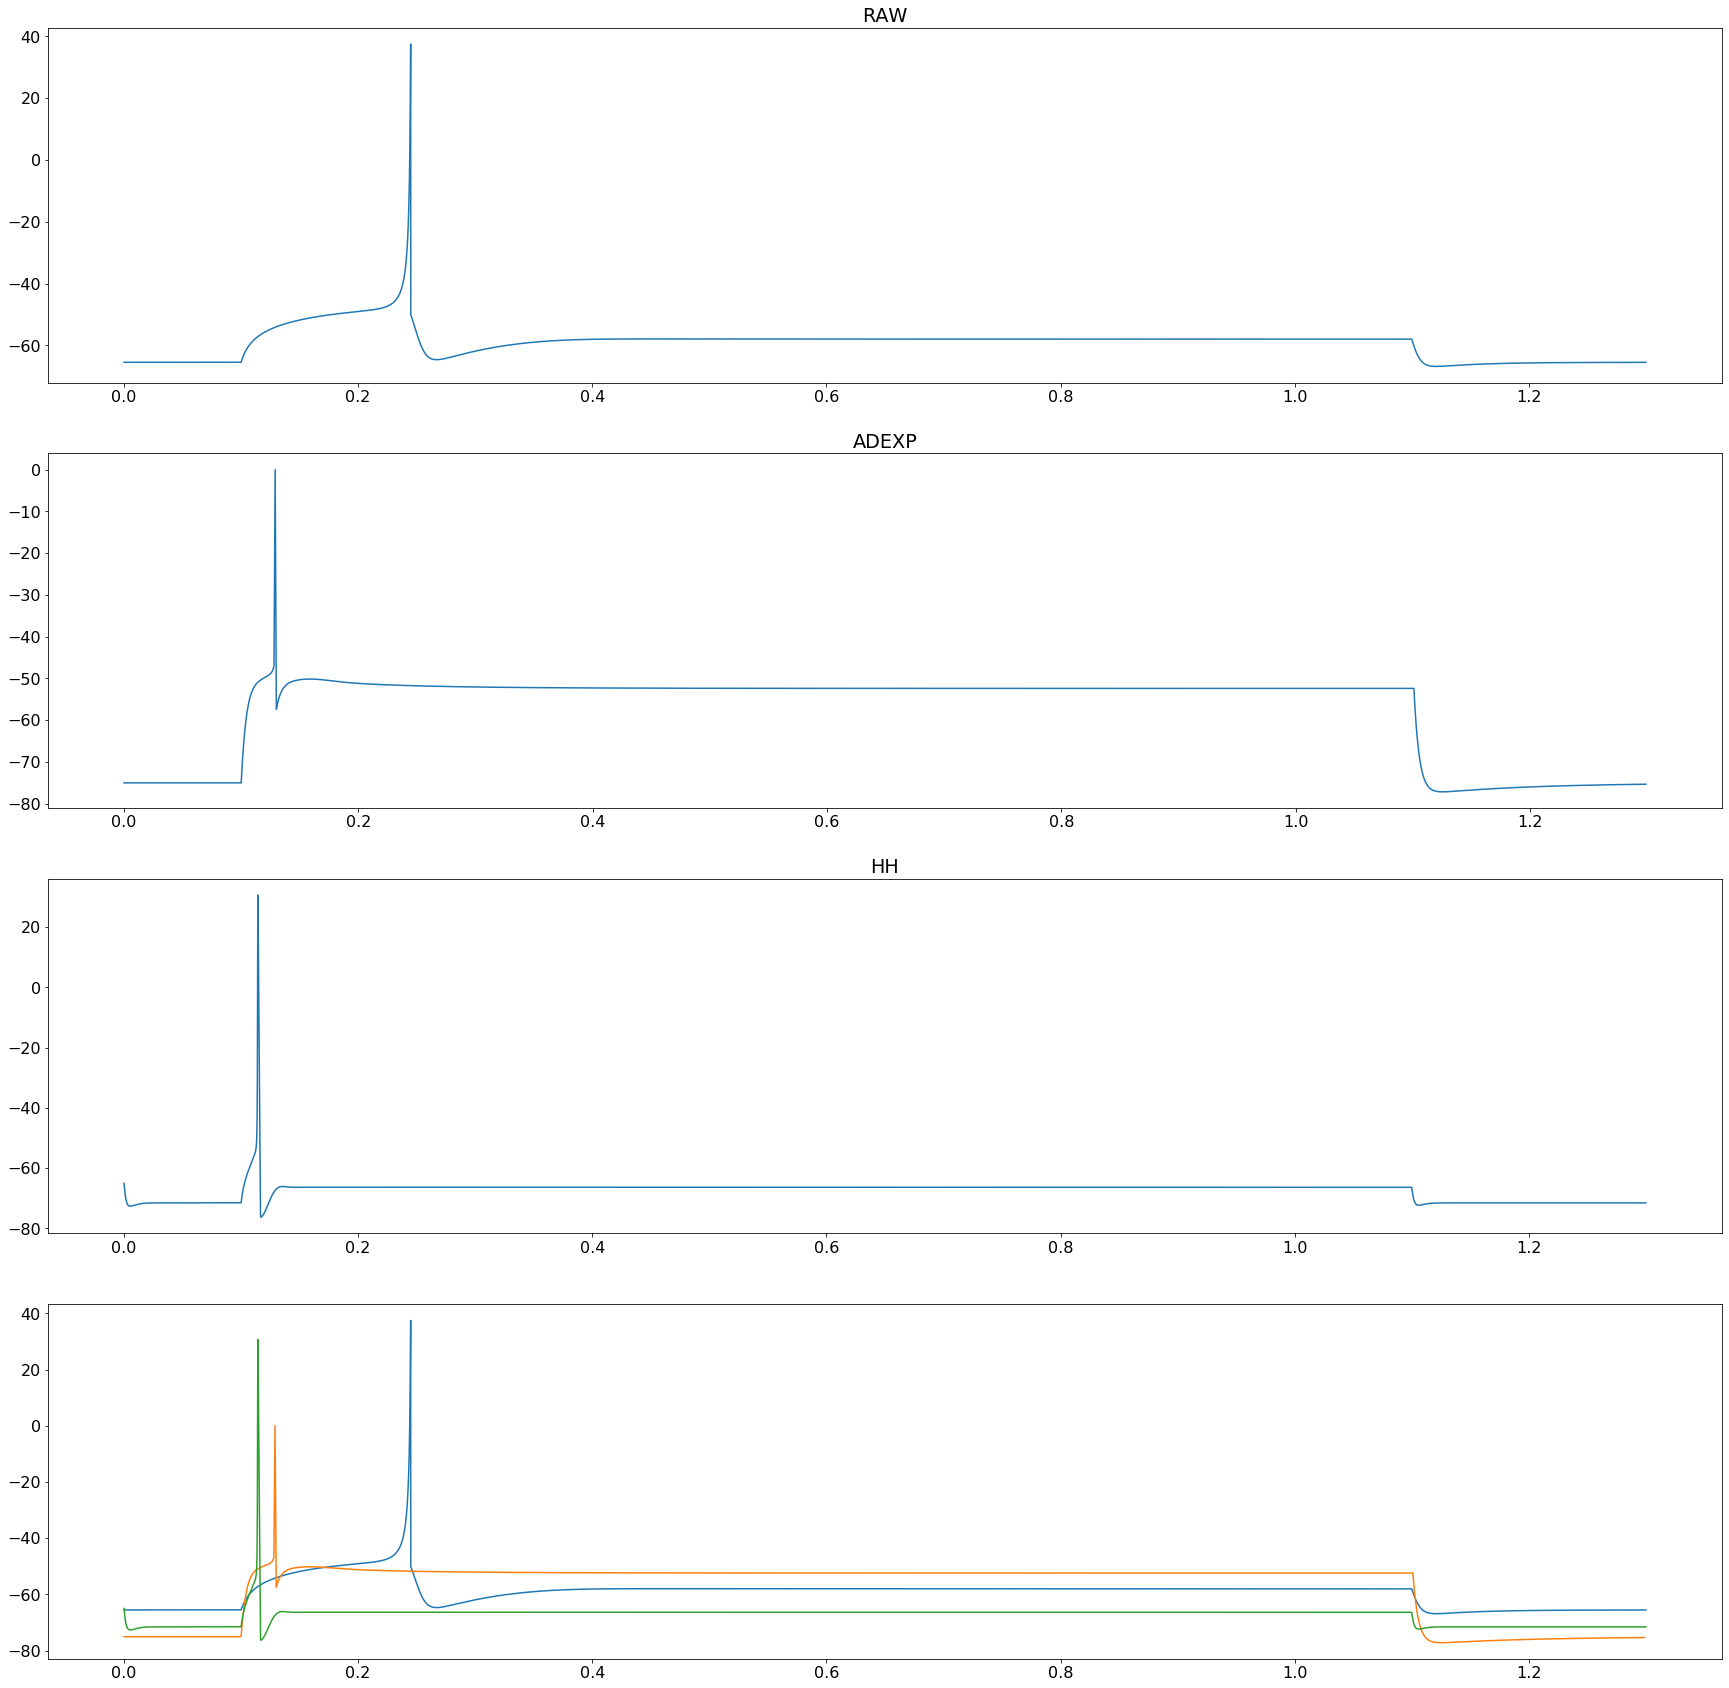

In [8]:
from neuronunit.optimisation import model_parameters
model_parameters.MODEL_PARAMS.keys()
backends = ["RAW", "ADEXP", "HH"]
fig, axs = plt.subplots(len(backends)+1,figsize=(30, 30))
cnt=0
for b in backends:
    raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[b].items()}
    pre_model = DataTC()
    if str("V_REST") in raw_attrs.keys():
        raw_attrs["V_REST"] = -75.0

    pre_model.attrs = raw_attrs
    pre_model.backend = b
    dtc = dtc_to_rheo(pre_model)
    print(dtc.rheobase)
    
    vm,_ = inject_and_plot_model(raw_attrs,b)
    #vm,_ = inject_and_plot_passive_model(raw_attrs,b)
    axs[cnt].plot(vm.times,vm.magnitude)
    axs[cnt].set_title(b)

    cnt+=1
#fig.show()  
    #inject_and_plot_passive_model(raw_attrs,b)


In [4]:
import brian2 as b2

b2.A = 1000000000000*b2.pA

In [5]:
from neuronunit.optimisation import model_parameters
model_parameters.MODEL_PARAMS.keys()
backend = "RAW"
raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[backend].items()}


Injected 300.0 pA current and got 20165 spikes
Injected -0.0 pA current and got 0 spikes
Injected 150.0 pA current and got 10127 spikes
Injected 75.0 pA current and got 5199 spikes
Injected 37.5 pA current and got 2705 spikes
Injected 18.75 pA current and got 1438 spikes
Injected 9.375 pA current and got 784 spikes
Injected 4.6875 pA current and got 440 spikes
Injected 2.34375 pA current and got 249 spikes
Injected 1.171875 pA current and got 136 spikes
Injected 0.5859375 pA current and got 64 spikes
Injected 0.29296875 pA current and got 18 spikes
Injected 0.146484375 pA current and got 0 spikes
Injected 0.2197265625 pA current and got 9 spikes
Injected 0.18310546875 pA current and got 1 spikes
Injected 0.164794921875 pA current and got 1 spikes
Injected 0.1556396484375 pA current and got 0 spikes
Injected 0.16021728515625 pA current and got 0 spikes
Injected 0.162506103515625 pA current and got 1 spikes
Injected 0.1613616943359375 pA current and got 1 spikes
Injected 0.16078948974609

(AnalogSignal with 1 channels of length 260000; units mV; datatype float64 
 sampling rate: 200.0 1/ms
 time: 0.0 s to 1.3 s,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>)

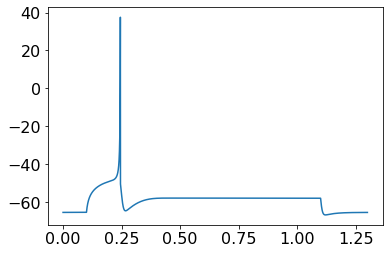

In [6]:
inject_and_plot_model(raw_attrs,backend)


In [7]:
pre_model.rheobase

array(3.408712148666382) * pA